In [23]:
'''
Author: Serena Raju
Institution: Mumbai University
Date created: Feb 8 2021
Last Update: Feb 16 2021
Filename: random_demo.ipynb
***
*****************************************************************************************
*
*        		===============================================
*  Code to demonstrate Derivative Free Random Search Hyper Parameter Optimization
*        		===============================================
*
*****************************************************************************************
'''
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import sklearn.model_selection as model_selection
from sklearn.ensemble import RandomForestClassifier
from random import randint
from pandas import read_csv
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import matplotlib.image as mpimg
import time

## Metaphorically speaking: <br>
Derivative based -> Walking down a hilly region (Convex regions -> Convex functions -> Functions that are differentiable) <br>
Derivative free -> Rowing a boat on a lake (No convex regions as such -> Functions are not necessarily differentiable -> Noisy, stochastic, deterministic) <br>
## Point of optimization: <br>
MAXIMUM accuracy with MINIMUM computation cost 

## Grid Search Visualization
![](grid_search.png)


## Random Search Visualization
![](random_search.png)

## Visualization of both the methods together
Citation: J. Bergstra, Y. Bengio, Random search for hyper-parameter optimization (2012), Journal of Machine Learning Research.


![](both.png)

In [25]:
param = {'max_depth': [15, 13, 10], 
         'n_estimators':[40, 50, 70], 
          'max_features': [0.65, 0.7,0.9],
          'criterion' : ['gini', 'entropy'],
          'bootstrap':[True, False],
          'min_samples_leaf': [randint(1,4)]}
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv'
dataframe = read_csv(url, header=None)
print(dataframe.head())

       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0044   R  
2  0.0095  0.0078   

In [27]:
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
print("X (values) shape:", X.shape)
print("Y (labels) shape:",y.shape)

X (values) shape: (208, 60)
Y (labels) shape: (208,)


### Implementation of Random Search

In [29]:
t = time.time()
rnd_search = RandomizedSearchCV(RandomForestClassifier(n_jobs = 4), param, n_iter = 10, cv=None, refit = True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.8,test_size=0.2, shuffle = True, random_state=101)
rnd_search.fit(X_train,y_train)

print(rnd_search.best_params_)
print(rnd_search.best_score_)
print(rnd_search.predict(X_test))
print(y_test)
predictions = rnd_search.predict(X_test)
r_conf_mat = confusion_matrix(y_test, predictions)
print(r_conf_mat)
t = time.time() - t

C:\Users\Serena Raju\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
{'n_estimators': 70, 'min_samples_leaf': 2, 'max_features': 0.65, 'max_depth': 15, 'criterion': 'entropy', 'bootstrap': True}
0.7469879518072289
['M' 'M' 'M' 'M' 'M' 'M' 'M' 'R' 'R' 'R' 'M' 'R' 'R' 'R' 'M' 'R' 'R' 'M'
 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'R' 'R' 'M' 'R' 'M' 'R' 'R' 'M' 'M' 'R' 'M'
 'M' 'M' 'M' 'R' 'R' 'M']
['M' 'M' 'M' 'M' 'M' 'M' 'M' 'R' 'R' 'R' 'M' 'R' 'R' 'M' 'M' 'R' 'R' 'M'
 'R' 'R' 'R' 'R' 'M' 'R' 'M' 'R' 'R' 'M' 'M' 'M' 'R' 'R' 'M' 'R' 'R' 'M'
 'M' 'R' 'M' 'R' 'R' 'M']
[[18  3]
 [ 2 19]]


### Random Saved Output
![](Random_Out.png)

In [31]:
# t = 9.91795039176941 
print('Time taken by Random Search is:', t) 
# Time taken by Random Search is: 9.91795039176941

Time taken by Random Search is: 10.234628438949585


### Confusion matrix of Random Search

In [32]:
#r_conf_mat = np.array([[19,2],[1,20]])

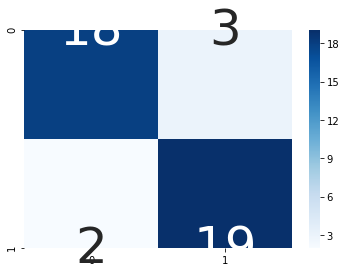

In [33]:
labels = ['True R','False R','False M','True M']
labels = np.asarray(labels).reshape(2,2)
x = sns.heatmap(r_conf_mat, annot=True, fmt='', cmap = 'Blues',annot_kws={"fontsize":50, "verticalalignment":'top'})

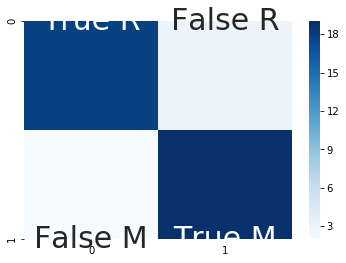

In [34]:
x = sns.heatmap(r_conf_mat, annot=labels, fmt='', cmap = 'Blues', annot_kws={"fontsize":30, "verticalalignment":'top'})

### Implementation of Grid Search

In [35]:
t = time.time()
grd_search = GridSearchCV(RandomForestClassifier(n_jobs = 4), param, cv=None, refit = True)
grd_search.fit(X_train,y_train)
print(grd_search.best_params_)
print(grd_search.best_score_)
print(grd_search.predict(X_test))
print(y_test)
predictions = grd_search.predict(X_test)
conf_mat = confusion_matrix(y_test, predictions)
print(conf_mat)
t = time.time() -t

C:\Users\Serena Raju\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 0.65, 'min_samples_leaf': 2, 'n_estimators': 40}
0.7650602409638554
['R' 'M' 'M' 'M' 'M' 'M' 'M' 'R' 'R' 'R' 'M' 'R' 'R' 'R' 'M' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'R' 'R' 'M' 'M' 'M' 'R' 'M' 'M' 'M' 'R' 'M'
 'M' 'R' 'M' 'R' 'R' 'M']
['M' 'M' 'M' 'M' 'M' 'M' 'M' 'R' 'R' 'R' 'M' 'R' 'R' 'M' 'M' 'R' 'R' 'M'
 'R' 'R' 'R' 'R' 'M' 'R' 'M' 'R' 'R' 'M' 'M' 'M' 'R' 'R' 'M' 'R' 'R' 'M'
 'M' 'R' 'M' 'R' 'R' 'M']
[[17  4]
 [ 2 19]]


### Grid Saved Output
![](Grid_Output.png)

In [36]:
#t = 94.59582233428955
print("Time taken by Grid Search is:", t)
# Time taken by Grid Search is: 94.59582233428955

Time taken by Grid Search is: 104.54796648025513


### Confusion matrix of Grid Search

In [37]:
#conf_mat = np.array([[19,2],[4,17]])

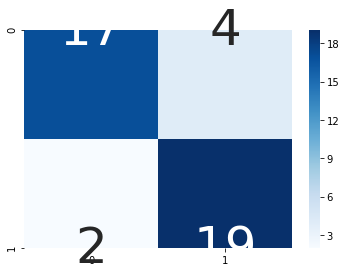

In [38]:
labels = ['True R','False R','False M','True M']
labels = np.asarray(labels).reshape(2,2)
x = sns.heatmap(conf_mat, annot=True, fmt='', cmap = 'Blues', annot_kws={"fontsize":50, "verticalalignment":'top'})

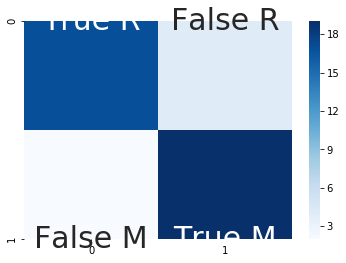

In [39]:
x = sns.heatmap(conf_mat, annot=labels, fmt='', cmap = 'Blues', annot_kws={"fontsize":30, "verticalalignment":'top'})

### Experiment on Random vs Grid

(https://towardsdatascience.com/random-search-vs-grid-search-for-hyperparameter-optimization-345e1422899d)


![](exp_10.png)

## Results of remaining experiments <br>
No. of trials: 10 <br>
Grid Search:	5	(2935.44) <br>
Random Search:	5	(3692.77) <br>
No. of trials: 50 <br>
Grid Search:	16	(8119.40) <br>
Random Search:	34	(6885.77) <br>
No. of trials: 100 <br>
Grid Search:	8	(17449.96) <br>
Random Search:	92	(9118.30) <br>
No. of trials: 500 <br>
Grid Search:	221	(17441.61) <br>
Random Search:	279	(20750.24) <br>